<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%2010/MIS710_Lab10_NLP_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lab 10 Week 10**
Author: Associate Professor Lemai Nguyen

Objectives:
1. To learn text analytics and NLP basics
2. To apply the basic skills on the well-known Internet Movie Database developed by Stanford researcher Andrew Maas.
3. To learn basic MLOps: saving your model and loading and using it later.
4. Optional: To apply the basic NLP skills on another review dataset.


Note: There is a separate MIS710_Lab10_NLP_Deployment where you can load the saved model and apply it to make predictions.



# **1. Import Libraries and Functions**

Import libraries and functions that are central to this lab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as   np

import seaborn as sns
import matplotlib.pyplot as plt

Import classes and functions for ML tasks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **2. Case One: IMDb**

**Sentiment analysis**

**Context**
IMDb stands for the Internet Movie Database, which is an online database of information related to films, television programs, and video games. It contains a vast collection of data on various aspects of the entertainment industry, including cast and crew information, production details, plot summaries, and user ratings and reviews.

**Content**
The IMDb dataset has been widely used in sentiment analysis research. The dataset contains 50,000 movie reviews. Each review is labeled as either "positive" or "negative" based on the overall sentiment expressed in the review.

The dataset consists of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

**Inspiration**
To train and test a sentiment analysis model

**Further information**:
Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).

http://ai.stanford.edu/~amaas/data/sentiment/


## **2.1. Data Loading**

In [ ]:
url = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/Week%2010/IMDb.csv'
records = pd.read_csv(url, index_col=None)

In [ ]:
#explore the dataset
print(records)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


## **2.2. Data Preparation, Exploration and Visualisation**

### **Data inspection and cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
records.sample(10)

,review,sentiment
17129,"Visually disjointed and full of itself, the di...",negative
47288,(the description of the mood of the movie may ...,positive
11903,"""Blind Date"" is one of three stories-made-into...",positive
42996,I have watched every version of this play that...,positive
15302,"I should have listened. I was warned, and stil...",negative
12384,Apart from the fact that this film was made ( ...,negative
42572,Lights of New York was the first all-talking f...,positive
21319,"If you're into alternate realities, contemplat...",positive
28444,I would say that this film gives an insight to...,positive
24308,***SPOILERS*** ***SPOILERS*** If one were to r...,negative


,review,sentiment
20226,I don't play video games at all but my childre...,positive
14899,THE FOX AND THE CHILD is the latest film from ...,positive
31762,I caught a screening of this at the True/False...,negative
2824,The fact that there are positive comments abou...,negative
47877,One of the funniest films I ever saw in the th...,positive
15191,Just after watching the first one and it is ve...,negative
36103,Goldie Hawn's depiction of a simple young lady...,positive
38025,"Possibly not, but it is awful. Even the fantas...",negative
8434,From Kreestos: <br /><br />The dialog is terri...,negative
22907,Set in Bam Margera's hometown of Westchester P...,positive


In [ ]:
records['review'].head(5)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [ ]:
records['review'].tail(5)

49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object

49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object

In [ ]:
#You can check to have a feel:
records['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
#Inspect missing data
print(records.isnull().sum())

review       0
sentiment    0
dtype: int64
review       0
sentiment    0
dtype: int64


### **EDA**

* Analyse and visualise the sentiment column (target)

In [ ]:
# Get frequency of positive and negative reviews
sentiment_counts = records['sentiment'].value_counts()
print(sentiment_counts)

positive    25000
negative    25000
Name: sentiment, dtype: int64
positive    25000
negative    25000
Name: sentiment, dtype: int64


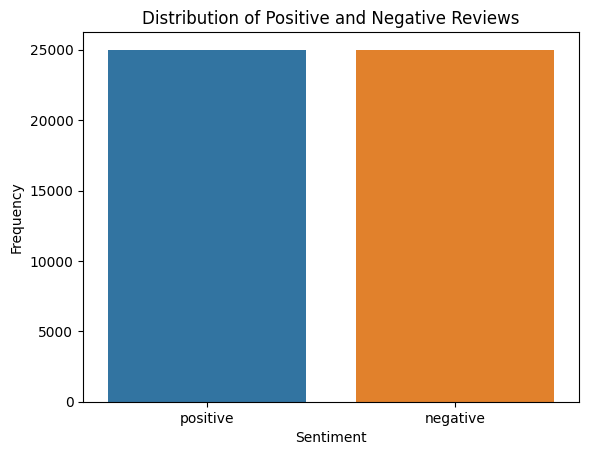

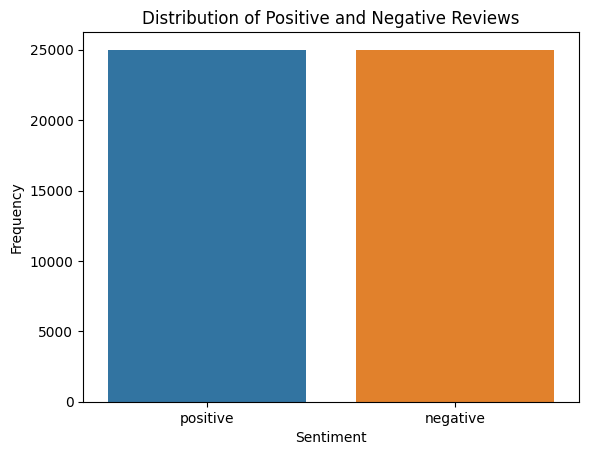

In [ ]:
# Plot bar chart of sentiment counts
sns.countplot(data=records, x='sentiment')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

### **Text pre-processing**
* Text cleaning: Remove any HTML tags, punctuation, and special characters from the reviews.
* Lowercasing: Convert all text to lowercase to ensure that words with the same spelling but different capitalization are treated as the same word.
* Tokenization: Split the text into individual words or tokens.
* Stopword removal: Remove common words such as "the", "and", "a", etc. that do not add much meaning to the text.
* Stemming/Lemmatization: Reduce words to their base form to normalize the text and group together words with similar meanings.

re is a built-in Python module for working with regular expressions. Regular expressions are a combination of alphanumeric characters and special characters. For example, the . character in a regular expression matches any single character, while the * character matches zero or more occurrences of the preceding character.

#### **Text cleaning**

In [ ]:
#import the Python module re to work with regular expressions
import re

The re.sub() method takes three arguments:

1.   The regular expression pattern to search for.
2.   The replacement string to use for each match of the pattern.
3. The input string to perform the substitution on.

Let's define our clean_text funtion that cleans a given text and returned the cleaned version of it.

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  return text

* The . (dot) metacharacter matches any single character except for a newline character.
* The * (asterisk) metacharacter matches zero or more occurrences of the preceding character or group.

* \w matches any word character, which  includes all alphabetic characters (both upper- and lowercase) and digits, and the underscore character.

* \s matches any whitespace character, which includes spaces, tabs, newlines, and other types of whitespace.

* \s+ matches one or more consecutive whitespace characters. The + (plus) is a metacharacter that means "one or more occurrences of the preceding pattern".

We have defined the clean_text function, now let's write your code for the whole reviews to apply it.

Pandas DataFrame apply() function can be used to apply a function along an axis. We can direct  the column ['review'] to apply the clean_text function. It will apply the function for all values in this column.
https://www.w3schools.com/python/pandas/ref_df_apply.asp

In [ ]:
#let's get reviews to run clean_text
records['review']= records['review'].apply(clean_text)

In [ ]:
#You can check to have a feel:
records['review'][3]

'Basically theres a family where a little boy Jake thinks theres a zombie in his closet his parents are fighting all the timeThis movie is slower than a soap opera and suddenly Jake decides to become Rambo and kill the zombieOK first of all when youre going to make a film you must Decide if its a thriller or a drama As a drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents descent dialogs As for the shots with Jake just ignore them'

#### **Lowercasing**

In [ ]:
#define the lowercasing function to turn all letters into lowercases.
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

**Task 1**: apply this function on the Review column in the same way we have done with the clean_text function. Do it yourself!

In [ ]:
# let's get reviews to run lowercasing, hint use apply(lowercasing)
records['review']= records['review'].apply(lowercasing)

In [ ]:
#You can check to have a feel:
records['review'][3]

'basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents descent dialogs as for the shots with jake just ignore them'

#### **Tokenization, Stemming and Lemmatization**

* Tokenization breaks the text into individual words or tokens, and then stemming/lemmatization is applied on each token individually to obtain their root form.

* Stemming can help in reducing  words to their root form, which can help in reducing the number of unique words and therefore reducing the size of the vocabulary. For example: studies, study, studied, studying -> studi; flew -> fle; import PorterStemmer for stemming.

* Lemmatization reduces a word to its base or dictionary form, which can improve the accuracy of the analysis; For example: studies, study, studied, studying -> study; flew -> fly;  import WordNetLemmatizer for lemmatization.

NLTK (Natural Language Toolkit) is a Python library used for natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more.

In [ ]:
#import NLTK and functions for Tokenization, Stemming and Lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#import NLTK stopwords from its corpus
from nltk.corpus import stopwords

Punkt and WordNet are both modules in the Natural Language Toolkit (nltk) library in Python for natural language processing tasks.

* Punkt is a module used for tokenization. The Punkt module is trained on large corpora and uses unsupervised learning algorithms to tokenize sentences effectively even when presented with challenging text.

* WordNet is a large lexical database of English words for lemmatization.

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# define stopwords without negation words
stop_words = set(stopwords.words('english'))
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}
filtered_words = [word for word in stop_words if word not in negation_words]

We can remove stopwords—before, during, or after lemmatization—often depending on the specific use case, the nature of the text data, and the desired outcome. Here we combines two steps into one for efficiency.

Below, we lemmatize words if they are not in filtered words.

In [ ]:
#define a function to perform tokenization and lemmatization
def tokenize_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text)

  #initialize stemmer OR lemmatizer
  lemmatizer = WordNetLemmatizer()

  # Filtering out the stopwords and lemmatizing the tokens
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in filtered_words and token.lower() not in negation_words]
  return ' '.join(lemmatized_tokens)


**Alternatively**, you can use stemming


```
#define a function to perform tokenization and stemming
def tokenize_stem(text):
  #tokenization
  tokens = nltk.word_tokenize(text.lower())
  
  #initialize stemmer
  stemmer = PorterStemmer()

  # Filtering out the stopwords and stem the tokens
  stemmed_tokens = [stemmer.stem(token) for token in tokens]

  return ' '.join(lemmatized_tokens)
```



**Task 2.** Apply the tokenize_lemmatize function on the cleaned and lowercased reviews. Do it yourself.

Warning: This may take a minute or two!

In [ ]:
# Tokenize and lemmatize the review text
processed_text = records['review'].apply(tokenize_lemmatize)

In [ ]:
#now you can see the effect:
processed_text

,review
0,one reviewer mentioned watching 1 oz episode y...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,im going disagree previous comment side maltin...


**Note**: The WordNetLemmatizer from NLTK relies on the WordNet database. By default, the lemmatizer treats every word as a noun unless told otherwise. To get the correct lemma, e.g. gerund forms of verbs, we need to provide the part-of-speech (POS) tag to the lemmatizer. More processing is needed.

### **Feature selection and Vectorisation**



**Preventing vocabulary leakage**

A vectorizer is a process of converting textual data into numerical vectors that can be used as input for machine learning algorithms.

If we vectorize the whole dataset before splitting into training and test sets, there is a risk of data leakage. This is because the information from the whole dataset (including test set) is used to prepare the training dataset.

To prevent this risk, we split the dataset first. We fit the initialised vectorizer only on the training data. Use this fitted vectorizer to transform both the training and test data. This is similar to how we scaled datasets in previous labs.

#### **Feature Selection and Target Specification**

In [ ]:
X=processed_text
y=records['sentiment']

#### **Data splitting**

Now we will split the pre-processed dataset first then apply vectorisation.

**Task 3**: Write your own split code

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

#write your code below



In [ ]:
X_train

21850    saw movie brief run art house cinema 69 found ...
29191    thing make fire even appealing watch apart mag...
45175    ok 11 year ago awesome funny movie mask came e...
17891    youve heard said live every moment last whethe...
7512     horror story alright perhaps know real monster...
                               ...                        
39427    karl jr dad running army remote island capture...
38620    metaphoric fly fled steaming watery stool film...
38817    well movie started funny quickly deteriorated ...
47558    believe anyone giving film good rating additio...
22041    could well worst film ive ever seen despite mi...
Name: review, Length: 40000, dtype: object

21850    saw movie brief run art house cinema 69 found ...
29191    thing make fire even appealing watch apart mag...
45175    ok 11 year ago awesome funny movie mask came e...
17891    youve heard said live every moment last whethe...
7512     horror story alright perhaps know real monster...
                               ...                        
39427    karl jr dad running army remote island capture...
38620    metaphoric fly fled steaming watery stool film...
38817    well movie started funny quickly deteriorated ...
47558    believe anyone giving film good rating additio...
22041    could well worst film ive ever seen despite mi...
Name: review, Length: 40000, dtype: object

#### **Vectorization**

A vectorizer is a process of converting textual data into numerical vectors that can be used as input for machine learning algorithms.

* Using a bag-of-words model, a vectorizer counts the frequency of each word in a document and represents the document as a vector of word frequencies. The function CountVectorizer converts a collection of text documents to a matrix of token counts.
* Using TF-IDF (Term Frequency-Inverse Document Frequency). It quantifies the importance of a term within a document relative to a collection of documents (often called a corpus). The higher the TF-IDF score of a term, the more unique and significant it is to the specific document in the context of the entire corpus. This serves a feature extraction as well.

The vectorisation produces a sparse representation of the counts. Since most words in a vocabulary will not appear in a typical document, the resulting matrix will have many zeroes, hence it's sparse.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

**Optional:** You can apply n-gram vectorisation by specifying a range ngram_range=(min, max).

We might want to write ngram_range=(1,2) but to demonstrate the effect, you can use ngram_range=(2,2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.7, ngram_range=(1, 2))

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Note**: Fit on the training data only, then transform i.e., vectorize both train and test datasets. The transform method converts X_test into a vectorized format based on the vocabulary learned from X_train. It doesn't update the vocabulary. So, any words in X_test that weren't in X_train will be ignored.

The following may take a shortwhile.

Option: if you use tfidf_vectorizer = TfidfVectorizer(max_df=0.7, ngram_range=(2, 2)) then check first 20 words from the vocabulary learned from the X_train and the size.

In [ ]:
# Get the list of features (i.e., words)
features = tfidf_vectorizer.vocabulary_

# List the first 20 words
print(list(features)[:20])

['saw', 'movie', 'brief', 'run', 'art', 'house', 'cinema', '69', 'found', 'funny', 'literally', 'spent', 'part', 'floor', 'laughed', 'hard', 'fell', 'seat', 'retrospect', 'year']


In [ ]:
print('Vocabulary size:', len(features))

Vocabulary size: 2776800


In [ ]:
print('Trainning set:', len(y_train))
print('Testing set:', len(y_test))

Trainning set: 40000
Testing set: 10000


Now we have turned the reviews (in training and test) into a sparse matrix.

**Note**: you can see the 2-gram tokens, you can go back and vectorise the datasets with vectorizer = CountVectorizer(ngram_range=(1,2)) to include both 1-grams and 2-grams.

## **2.3. Sentiment Analysis**

### **2.3.1 Logistric regression model**

#### Model building

**Task 4**: Write your own code to fit a logistic regression classifier lr. Hint: use X_train_vec.

This may take a minute or so.

In [ ]:
# Train logistic regression model
lr = LogisticRegression(penalty='l2', C=2, solver='liblinear', max_iter=1000, random_state=2023)

#write your code below to fit the model


LogisticRegression(C=2, max_iter=1000, random_state=2023, solver='liblinear')

####Performance evaluation
* Classification metrics and report
* Confusion matrix
* TPR and FPR
* ROC and AUC


**Task 5**: Write your own code to make predictions

In [ ]:
# Write code to make predictions


In [ ]:
#get predicted probabilities for the main class
y_pred_probs_lr = lr.predict_proba(X_test_tfidf)
y_pred_probs_lr = y_pred_probs_lr[:, 1]

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lr})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

,review,Actual,Predicted
17736,eddie murphy stand woman audience yell eddie m...,positive,positive
48961,big fat liar opinion absolutely hilarious movi...,positive,positive
5959,john water owes 2 hour life back saw sneakprev...,negative,negative
18527,chose watch film stephen nichols fan unfortuna...,negative,negative
46746,boy oh boy movie stink movie one worst piece t...,negative,negative
3659,spent many year studying great director like k...,positive,positive
420,movie start main character lying coma hospital...,negative,negative
23045,saw movie last night phila film festival inter...,positive,positive
27435,kaliforniais great film make u look ourselvest...,positive,positive
11351,anyone find interesting ood look strangely sim...,positive,positive


**Task 6**: generate the confusion matrix and classification report.

In [ ]:
#print confusion matrix and evaluation report, hint use confusion_matrix(y_test, y_pred_lr)
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)
print(classification_report(y_test, y_pred_lr))

[[4390  571]
 [ 435 4604]]
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



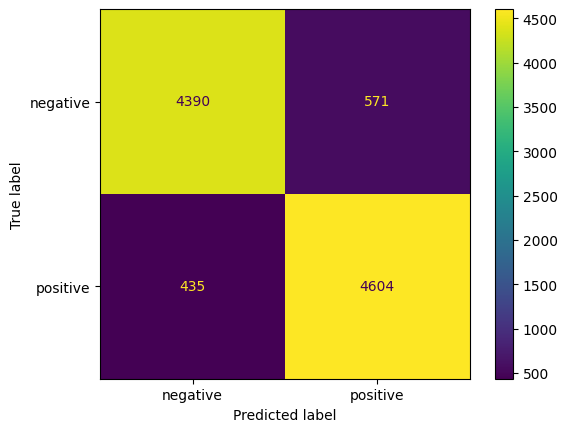

In [ ]:
#import classes to display Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

In [ ]:
# Computer TN FP FN TP
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()

# Compute FPT and TPR for this k
tpr_lr = tp / (tp + fn)
fpr_lr = fp / (fp + tn)

print('True Positive Rate: ', '%.3f' % tpr_lr)
print('False Positive Rate: ', '%.3f' % fpr_lr)


True Positive Rate:  0.914
False Positive Rate:  0.115


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode labels as 0s and 1s so you can compute fpr and tfr for thresholds
le = LabelEncoder()
y_true = le.fit_transform(y_test)

AUC: 0.963


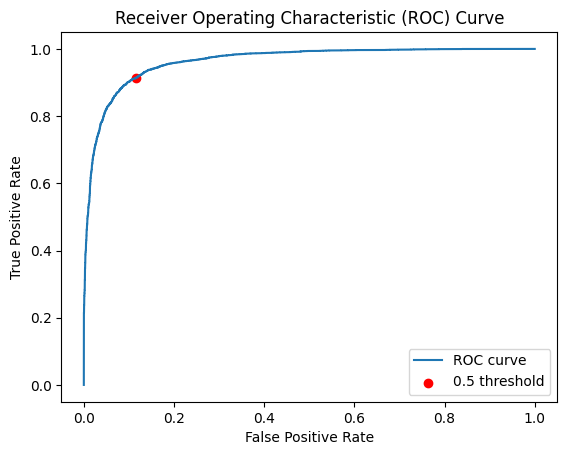

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and threshold
fprs_lr, tprs_lr, thresholds_lr = roc_curve(y_true, y_pred_probs_lr)
auc_lr= metrics.auc(fprs_lr, tprs_lr)
print('AUC:', '%.3f' % auc_lr)

# plot the ROC curve and the best point
plt.plot(fprs_lr, tprs_lr, label='ROC curve')
plt.scatter(x=fpr_lr, y=tpr_lr, marker='o', color='red', label='0.5 threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### **2.3.2 Random Forest model**

#### Model building

Let's expand on Topic 8 by learning how to use GridSearchCV. Begin by initialising a RandomForestClassifier() object, and then set the parameters you'd like to tune. As an example, we can define the following hyperparameters along with their possible values:

```
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
```
However, since we're dealing with a large sparse matrix, let's keep it simple for the learning purpose; this may affect the performance of our random forest model.


In [ ]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a RandomForest classifier
rf_clf = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [5, 10],
   # 'min_samples_split': [50, 100],
}

This will take several minutes

In [ ]:
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model to the data
grid_search.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10]}, verbose=2)

In [ ]:
# Best parameters found
print(grid_search.best_params_)

# Best estimator directly
best_rf_clf = grid_search.best_estimator_

{'max_depth': 10}


#### Performance evaluation
* Classification metrics and report
* Confusion matrix
* TPR and FPR
* ROC and AUC




**Task 7**: Write your code to make predictions for the test data record the results into y_pred_ann

In [ ]:
# evaluate the classifier on the testing data
y_pred_rf = best_rf_clf.predict(X_test_tfidf)

In [ ]:
#get predicted probabilities for the main class
y_pred_probs_rf = best_rf_clf.predict_proba(X_test_tfidf)
y_pred_probs_rf = y_pred_probs_rf[:, 1]


In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred_rf)
print(cm)
print(classification_report(y_test, y_pred_rf))

[[4080  881]
 [1019 4020]]
              precision    recall  f1-score   support

    negative       0.80      0.82      0.81      4961
    positive       0.82      0.80      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



**Task 8:** Write your code to calculate AUC

In [ ]:
# compute AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_pred_probs_rf)
auc_rf=metrics.auc(fpr_rf, tpr_rf)
print('AUC:', '%.3f' % auc_rf)

AUC: 0.892


### **2.3.3 Model comparision**

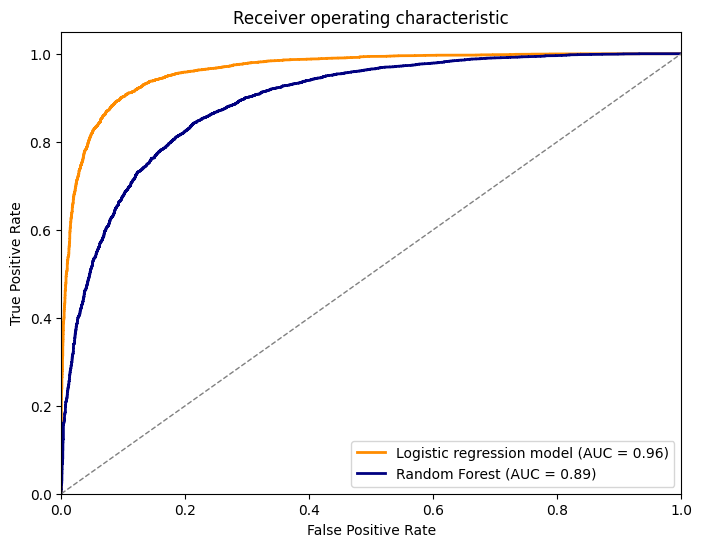

Logistic regression model AUC: 0.963
Random Forest model ACU: 0.893


In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprs_lr, tprs_lr, color='darkorange', lw=2, label='Logistic regression model (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, color='navy', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Logistic regression model AUC:','%.3f' %  auc_lr)
print('Random Forest model ACU:', '%.3f' %auc_rf)

**Task 9**: Which model you'd choose and why?

####Post-Analysis: Find best threshold

Let's select the logistic regression model

In [ ]:
from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds_lr:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_lr]
    accuracy.append(accuracy_score(y_true, y_pred_t))
best_threshold = thresholds_lr[accuracy.index(max(accuracy))]

print(best_threshold)

0.5345890887191115


In [ ]:
#get predicted probabilities for the best threshold
y_pred_best_lr = (lr.predict_proba(X_test_tfidf)[:,1] >= best_threshold).astype(bool)

print(y_pred_best_lr)

[ True  True False ... False False  True]


In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)
print(classification_report(y_test, y_pred_lr))

[[4390  571]
 [ 435 4604]]
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Computer TN FP FN TP for the best threshold
tn_bestThreshold, fp_bestThreshold, fn_bestThreshold, tp_bestThreshold = confusion_matrix(y_true, y_pred_best_lr).ravel()
print(confusion_matrix(y_true, y_pred_best_lr))
# Compute FPT and TPR for this k
tpr_bestThreshold = tp_bestThreshold / (tp_bestThreshold + fn_bestThreshold)
fpr_bestThreshold = fp_bestThreshold / (fp_bestThreshold + tn_bestThreshold)

print('True Positive Rate: ', '%.3f' % tpr_bestThreshold)
print('False Positive Rate: ', '%.3f' % fpr_bestThreshold)

[[4487  474]
 [ 506 4533]]
True Positive Rate:  0.900
False Positive Rate:  0.096


## **2.4. ML Operationalisation**

### **2.4.1. Import pickle and save the selected model**

We can use pickle and joblib to serialize and deserialize Python objects.  joblib is often favored in scientific computing and data science due to its efficient handling of large data structures like NumPy arrays. To use it, you should install an external package.

```
!pip install joblib
import joblib
```

However, pickle is a broader tool for general Python objects. Let's use it now.


Save both the vectoriser (with the vocabulary) and lr model to your selected folder(s).

In [ ]:
import pickle

# Define the path
path_vectorizer = '/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 10/tfidf_vectorizer.pickle'
path_model = '/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 10/IMDB_lr_clf.pickle'

# Save to file
with open(path_vectorizer, 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open(path_model, 'wb') as f:
    pickle.dump(lr, f)

**Task 10:** Write code to save your rf model

In [ ]:
path_rf = '/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 10/IMDB_rf_clf.pickle'

#write your code below to save  the rf model



You can also download the file

In [ ]:
#from google.colab import files

In [ ]:
#files.download('/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 10/IMDB_lr_clf.pickle')

### **2.4.2 Load and use the model**

**Unpickle**: Let's load our model and vocabulary and use them to  perform a sentiment analysis.

In [ ]:
with open(path_vectorizer, 'rb') as f:
    loaded_vectorizer = pickle.load(f)

with open(path_model, 'rb') as f:
    loaded_lr = pickle.load(f)

In [ ]:
#size of the vocabulary
print("Size of vocabulary:", len(loaded_vectorizer.vocabulary_))

Size of vocabulary: 2776800


As you see, we now have a vocabulary trained on the X_train_tfidf. Hope this is large enough and includes all words from the new reviews. If we don't pickle it, we don't have the same matrix space to apply the new reviews.

**Load new data**. I have collected 14 reviews about Dr Cha, a 2023 Kdrama from youtube. We load new reviews from the 'production line'.



In [ ]:
new_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 10/DrCha_reviews.csv')
print(new_reviews)

                                               review sentiment
0   I just watched the first episode and it’s 10/1...  positive
1   this is going to be absolutely amazing I can't...  positive
2   Accidentally watched the first episode, it was...  positive
3                          This actress is hilarious!  positive
4                             Looks very entertaining  positive
5                         annoying unnecesarry  scene  negative
6                           I love this drama so much  positive
7   Too convoluted and over dramatic. the writers ...  negative
8   Really good to see Km Byung Chul in a more com...  positive
9                              disappointed, too long  negative
10  I'm addicted to this movie, but If she doesn't...  positive
11      I love it. Can't wait to see the next episode  positive
12  The movie really disappoint me, his mother wil...  negative
13  Loved the first 2 episodes and excited for the...  positive


In practice, we should create a data pipeline to automate the pre-process of new data. Let's repeat the pre-processing steps for now.

**You can skip all import and def functions and jump to the Pre-processing steps below**

In [ ]:
#import the Python module re to work with regular expressions
import re

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  return text

In [ ]:
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# define stopwords without negation words
stop_words = set(stopwords.words('english'))
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}
filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization, stemming or lemmatization, use PorterStemmer for stemming
def tokenize_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text)

  #initialize stemmer OR lemmatizer
  lemmatizer = WordNetLemmatizer()

  # Filtering out the stopwords and lemmatizing the tokens
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in filtered_words and token.lower() not in negation_words]
  return ' '.join(lemmatized_tokens)

**Pre-processing steps**

In [ ]:
# Apply the clean_text function to the 'review' column
new_reviews['review'] = new_reviews['review'].apply(clean_text)

In [ ]:
new_reviews['review']=new_reviews['review'].apply(lowercasing)

In [ ]:
# Tokenize and lemmatize the review text
new_processed_text = new_reviews['review'].apply(tokenize_lemmatize)


In [ ]:
new_processed_text

,review
0,watched first episode 1010 im love
1,going absolutely amazing cant wait synopsis funny
2,accidentally watched first episode good couldn...
3,actress hilarious
4,look entertaining
5,annoying unnecesarry scene
6,love drama much
7,convoluted dramatic writer could made lot stro...
8,really good see km byung chul comedic setting
9,disappointed long


In [ ]:
#Use loaded vectorizer to vectorize the new processed text
X_new_tfidf = loaded_vectorizer.transform(new_processed_text)
y_test_new=new_reviews['sentiment']

In [ ]:
# Making predictions
y_pred_new = loaded_lr.predict(X_new_tfidf)

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':new_reviews['sentiment'], 'Predicted':y_pred_new})

#join X_test with the new dataframe
inspection=pd.concat([new_reviews['review'],inspection], axis=1)

inspection

,review,Actual,Predicted
0,i just watched the first episode and its 1010 ...,positive,positive
1,this is going to be absolutely amazing i cant ...,positive,positive
2,accidentally watched the first episode it was ...,positive,positive
3,this actress is hilarious,positive,positive
4,looks very entertaining,positive,positive
5,annoying unnecesarry scene,negative,negative
6,i love this drama so much,positive,positive
7,too convoluted and over dramatic the writers c...,negative,negative
8,really good to see km byung chul in a more com...,positive,positive
9,disappointed too long,negative,negative


**Task 11**: write your code to print confusion matrix and evaluation report

In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test_new, y_pred_new)
print(cm)
print(classification_report(y_test_new, y_pred_new))

[[3 1]
 [1 9]]
              precision    recall  f1-score   support

    negative       0.75      0.75      0.75         4
    positive       0.90      0.90      0.90        10

    accuracy                           0.86        14
   macro avg       0.82      0.82      0.82        14
weighted avg       0.86      0.86      0.86        14




**Task 12**: Optional

You can collect movie reviews and analyse emotions expressed, but make sure you do the same preprocessing first.

## **2.5. NLP Pipeline**

To reduce the training time for the purpose of learning, let's use only 1000 samples.

In [ ]:
records2=records.sample(1000)

In [ ]:
# Import necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Download required NLTK resources (one-time setup)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Remove stop words and perform tokenization and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  return text

def preprocess_text(text):
    prep_txt = clean_text(text)
    tokens = word_tokenize(prep_txt.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Define the Pipeline
pipeline = Pipeline([
    ('preprocess', TfidfVectorizer(preprocessor=preprocess_text)),
    ('classifier', SVC())
])

# Split the data into training and testing sets
X=records2.review
y=records2.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.83


**Additional steps to demonstrate an application of pipeline**

The pipeline includes both preprocessing (via TfidfVectorizer) and prediction (via SVC), taking care of transforming the raw text data of the new documents into the appropriate format for prediction automatically.

Later, we can call predict on the pipeline, it first preprocesses the data and then feeds it to the classifier for prediction.

To do so, we should train the model only as follows:

```
# Feature selection
X=records.review
y=records.sentiment

# Model Building
pipeline.fit(X,y)

```

In the pipeline above, you have trained the model on the whole dataset. Now you can call the pipeline to make predictions on the unseen data

```
predictions = pipeline.predict(new_documents)
```



In [ ]:
# Traing the pipeline on records2 of 1000 samples for the demonstration purpose
X=records2.review
y=records2.sentiment

# Model Building
pipeline.fit(X,y)

Pipeline(steps=[('preprocess',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x7e70221fe290>)),
                ('classifier', SVC())])

Let's sample 100 reviews from the original dataset of 50000 samples. Hope the overlap may be minimal.

In [ ]:
new_reviews=records.sample(100)

In [ ]:
predictions = pipeline.predict(new_reviews.review)

In [ ]:
accuracy = accuracy_score(new_reviews.sentiment, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.77


# **Congratulations**
Well done, you have completed your first sentiment analysis.
Now, let's do another exercise!



# **3. OPTIONAL - Case Two: Women's E-Commerce Clothing Reviews**

**Sentiment analysis**

**Context**
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

**Content**
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
* Age: Positive Integer variable of the reviewers age.
* Title: String variable for the title of the review.
* Review Text: String variable for the review body.
* Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
* Division Name: Categorical name of the product high level division.
* Department Name: Categorical name of the product department name.
* Class Name: Categorical name of the product class name.

**Inspiration**
For the purpose of Topic 10, let's predict recommendation: Yes or No based on the Title and Review Text.

Anonymous but real source

**Further information**:

https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

https://www.researchgate.net/publication/323545316_Statistical_Analysis_on_E-Commerce_Reviews_with_Sentiment_Classification_using_Bidirectional_Recurrent_Neural_Network

In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as   np

import seaborn as sns
import matplotlib.pyplot as plt

Import classes and functions for ML tasks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## **3.1 Data Loading**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/Reviews.csv'


In [ ]:
# load dataset
records = pd.read_csv(url, index_col=None)

In [ ]:
records.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## **3.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


**Detect missing data**

In [ ]:
records.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


**Feature engineering and selection**



Select variables of interest

In [ ]:
records=records.iloc[:, [2, 3, 4, 5, 6]]

Let's merge review title and review text columns, there is no need to keep them separately. By merging them, we can remove some missing values in either column.

In [ ]:
#create a new column by cpncatenating title and review text
records['Review'] = records.apply(lambda row: str(row['Title']) + str(row['Review Text']), axis=1)

In [ ]:
records.drop(columns=['Title', 'Review Text'], axis=1, inplace=True )

We don't have anymore missing data!

In [ ]:
records.isnull().sum()

,0
Age,0
Rating,0
Recommended IND,0
Review,0


In [ ]:
#rename the recommended IND, this is the target for classification
records = records.rename(columns={'Recommended IND': 'Recommended'})

### **EDA**

* Analyse and visualise the sentiment column

In [ ]:
# Get frequency of positive and negative reviews
sentiment_counts = records['Recommended'].value_counts()
print(sentiment_counts)

Recommended
1    19314
0     4172
Name: count, dtype: int64


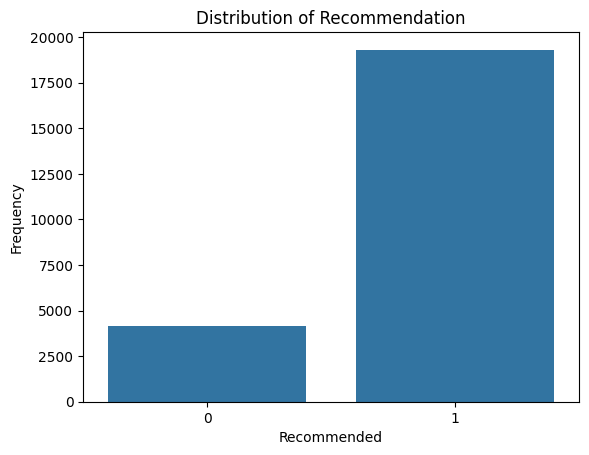

In [ ]:
# Plot bar chart of sentiment counts
sns.countplot(data=records, x='Recommended')
plt.title('Distribution of Recommendation')
plt.xlabel('Recommended')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Age'>

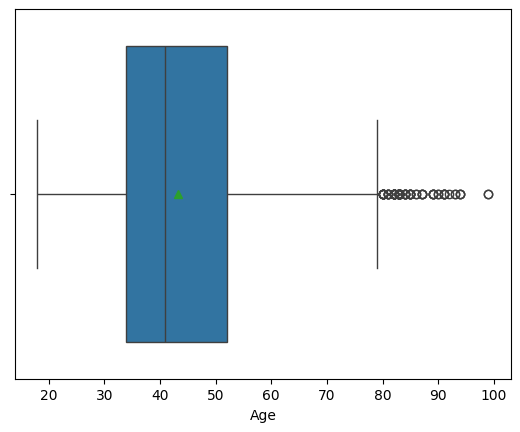

In [ ]:
sns.boxplot(data=records, x='Age',showmeans=True)

<ipython-input-95-7857e5384bdf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(records['Age'],bins=50)


<Axes: xlabel='Age', ylabel='Density'>

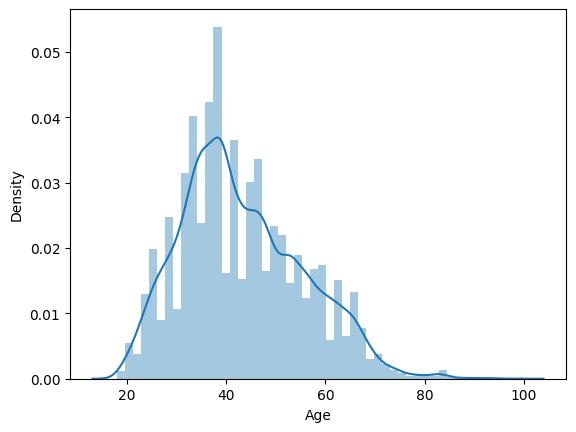

In [ ]:
sns.distplot(records['Age'],bins=50)

In [ ]:
# Map the values in column "Recommended" to "No" and "Yes"
records['Recommended_YN'] = records['Recommended'].map({0: 'No', 1: 'Yes'})

<Axes: xlabel='Age', ylabel='Recommended_YN'>

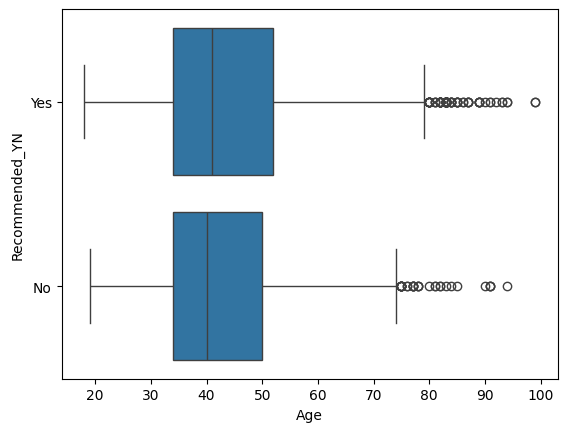

In [ ]:
sns.boxplot(data=records, x='Age', y='Recommended_YN')

<Axes: xlabel='Age', ylabel='Density'>

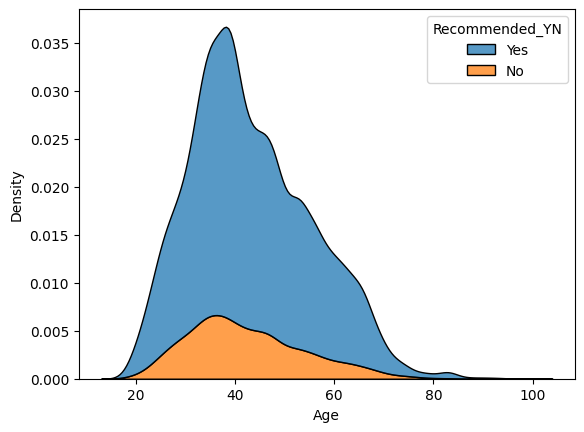

In [ ]:
sns.kdeplot(data=records, x='Age', hue='Recommended_YN', multiple='stack')

<Axes: xlabel='Rating', ylabel='count'>

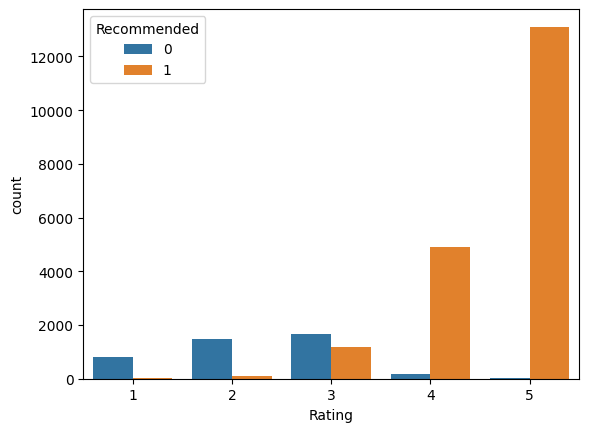

In [ ]:
sns.countplot(data=records, x='Rating', hue='Recommended')

### **Text pre-processing**
* Text cleaning: Remove any HTML tags, punctuation, and special characters from the reviews.
* Lowercasing: Convert all text to lowercase to ensure that words with the same spelling but different capitalization are treated as the same word.
* Tokenization: Split the text into individual words or tokens.
* Stopword removal: Remove common words such as "the", "and", "a", etc. that do not add much meaning to the text.
* Stemming/Lemmatization: Reduce words to their base form to normalize the text and group together words with similar meanings.

re is a built-in Python module for working with regular expressions. Regular expressions are a combination of alphanumeric characters and special characters. For example, the . character in a regular expression matches any single character, while the * character matches zero or more occurrences of the preceding character.

#### **Text cleaning**

In [ ]:
import re

The re.sub() method takes three arguments:

1.   The regular expression pattern to search for.
2.   The replacement string to use for each match of the pattern.
3. The input string to perform the substitution on.

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  # Remove the string 'nan' from column "Text", as we merged columns with missing texts together
  text = re.sub(r'nan', '', text)
  return text

* The . (dot) metacharacter matches any single character except for a newline character.
* The * (asterisk) metacharacter matches zero or more occurrences of the preceding character or group.

* \w matches any word character, which  includes all alphabetic characters (both upper- and lowercase) and digits, and the underscore character.

* \s matches any whitespace character, which includes spaces, tabs, newlines, and other types of whitespace.

* \s+ matches one or more consecutive whitespace characters. The + (plus) is a metacharacter that means "one or more occurrences of the preceding pattern".

**Task 13:** Write code for records['Review'] to apply clean_text

In [ ]:
# Apply the clean_text function to the 'review' column
records['Review'] = records['Review'].apply(clean_text)

In [ ]:
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

**Task 14:** Write code for records['Review'] to apply lowercasing

In [ ]:
#Write code for records['Review'] to apply lowercasing


#### **Tokenization, Stemming and Lemmatization**

* Tokenization breaks the text into individual words or tokens, and then stemming/lemmatization is applied on each token individually to obtain their root form.

* Stemming can help in reducing  words to their root form, which can help in reducing the number of unique words and therefore reducing the size of the vocabulary. For example: studies, study, studied, studying -> study

* Lemmatization reduces a word to its base or dictionary form, which can improve the accuracy of the analysis. By doing both stemming and lemmatization, we can get the benefits of both techniques and improve the overall performance of the sentiment analysis model.

NLTK (Natural Language Toolkit) is a Python library used for natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Punkt and WordNet are both modules in the Natural Language Toolkit (nltk) library in Python for natural language processing tasks.

* Punkt is a module used for tokenization. The Punkt module is trained on large corpora and uses unsupervised learning algorithms to tokenize sentences effectively even when presented with challenging text.

* WordNet is a large lexical database of English words for lemmatization.

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Get stopwords
stop_words = set(stopwords.words('english'))
#keep negation words because removing them may result in information loss
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}

filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization and lemmatization
def tokenize_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text.lower())

  #initialize lemmatizer
  lemmatizer = WordNetLemmatizer()

  #perform stemming and lemmatization
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in filtered_words and token.lower() not in negation_words]
  return ' '.join(lemmatized_tokens)

In [ ]:
# Tokenize, stem, and lemmatize the text
processed_text = records['Review'].apply(tokenize_lemmatize)


In [ ]:
# Create a new DataFrame that contains the processed text and Age columns
X = pd.DataFrame({'Processed_Text': processed_text, 'Age': records['Age'], 'Rating': records['Rating']})

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Processed_Text  23486 non-null  object
 1   Age             23486 non-null  int64 
 2   Rating          23486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.6+ KB


In [ ]:
#X=processed_text
y=records['Recommended']

#### **Vectorization**

A vectorizer is a process of converting textual data into numerical vectors that can be used as input for machine learning algorithms.

Using a bag-of-words model, a vectorizer counts the frequency of each word in a document and represents the document as a vector of word frequencies.

### **Data splitting**

**Task 15:** Write code to split data, don't forget to use stratify=y

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2023)


In [ ]:
X_train

,Processed_Text,Age,Rating
22625,lovely 56 34a282936 size small great fit moss ...,44,5
15763,cute run largei bought store without trying bo...,42,4
22642,boho chiclove dress neckline gorgeous,39,5
15436,unique peplum sweater soft comfy fabulousdark ...,44,5
3812,xl run smallwould loved skirt xl closer size 1...,33,3
...,...,...,...
7629,comfortable stylish great fitfinding boyfriend...,65,5
14784,hopedi wished fit little better unfortunately ...,57,1
19131,gorgeous timeless trenchfirst im navy person m...,57,5
15572,dreamy soft sweatervery warm snuggly gorgeous ...,45,5


In [ ]:
y_train.shape

(18788,)

**Task 16:** Write code to vectorise X_test_vec

In [ ]:
# Create a vector representation of the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['Processed_Text'])

#Write code to vectorise X_test_vec below, hint transform(X_test['Processed_Text'])


We have vectorised the Reviews, now add the other columns Age and Rating back

In [ ]:
# get the vocabulary of the corpus
feature_names = list(vectorizer.vocabulary_.keys())

In [ ]:
# Convert the sparse matrix to a dense matrix
X_train_vec = X_train_vec.toarray()

# make X_train_vec into columns
X_train_vec = pd.DataFrame(X_train_vec, columns=feature_names)
# merge the vectorized data with the Age column and fix indices
X_train_vec['Age'] = X_train['Age'].reset_index(drop=True)
X_train_vec['Rating'] = X_train['Rating'].reset_index(drop=True)

# View the vectorized text and 'age' column
print(X_train_vec.head())

   lovely  56  34a282936  size  small  great  fit  moss  color  really  ...  \
0       0   0          0     0      0      0    0     0      0       0  ...   
1       0   0          0     0      0      0    0     0      0       0  ...   
2       0   0          0     0      0      0    0     0      0       0  ...   
3       0   0          0     0      0      0    0     0      0       0  ...   
4       0   0          0     0      0      0    0     0      0       0  ...   

   easybought  leggingsmay  whatnot  yolk  contour  fitfinding  contrived  \
0           0            0        0     0        0           0          0   
1           0            0        0     0        0           0          0   
2           0            0        0     0        0           0          0   
3           0            0        0     0        0           0          0   
4           0            0        0     0        0           0          0   

   trenchfirst  Age  Rating  
0            0   44       5  
1 

**Task 17:** We have vectorised X_test as T_text_vec, now modify the previous code to add columns Age and Rating to the X_test_vec

In [ ]:
# Convert the sparse matrix to a dense matrix
X_test_vec = X_test_vec.toarray()

# make X_train_vec into columns
X_test_vec = pd.DataFrame(X_test_vec, columns=feature_names)
# merge the vectorized data with the Age column and fix indices
X_test_vec['Age'] = X_test['Age'].reset_index(drop=True)
X_test_vec['Rating'] = X_test['Rating'].reset_index(drop=True)

# View the vectorized text and 'age' column
print(X_test_vec.head())

   lovely  56  34a282936  size  small  great  fit  moss  color  really  ...  \
0       0   0          0     0      0      0    0     0      0       0  ...   
1       0   0          0     0      0      0    0     0      0       0  ...   
2       0   0          0     0      0      0    0     0      0       0  ...   
3       0   0          0     0      0      0    0     0      0       0  ...   
4       0   0          0     1      0      0    0     0      0       0  ...   

   easybought  leggingsmay  whatnot  yolk  contour  fitfinding  contrived  \
0           0            0        0     0        0           0          0   
1           0            0        0     0        0           0          0   
2           0            0        0     0        0           0          0   
3           0            0        0     0        0           0          0   
4           0            0        0     0        0           0          0   

   trenchfirst  Age  Rating  
0            0   40       5  
1 

Let's inspect the datasets

In [ ]:
def check_dataset(arg1, mydataset):
# Get frequency of positive and negative reviews
  unique, frequency = np.unique(mydataset, return_counts = True)
# print unique values array
  print(arg1, unique)
# print frequency array
  print(arg1, frequency)

check_dataset('Training: ', y_train)
check_dataset('Testing: ', y_test)

Training:  [0 1]
Training:  [ 3337 15451]
Testing:  [0 1]
Testing:  [ 835 3863]


## **3.3. Sentiment analysis**

### **3.3.1 Multinomial Naive Bayes - MultinomialNB**

Multinomial Naive Bayes os especially suitable for text classification problems. the MultinomialNB classifier calculates the likelihood of a term appearing in a document belonging to a class, based on the (naive) assumption that the occurrence of a word is independent of the occurrence of any other word in the document, given the document's class. In practice, the MultinomialNB classifier from sklearn is a good first choice for text classification problems due to its simplicity. It works suprisingly well in many occasions.


#### Model building

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_vec, y_train)

MultinomialNB()

**Task 18**: Make predictions

In [ ]:
# Write code to evaluate model


In [ ]:
#get predicted probabilities for the main class
y_pred_probs_nb = nb.predict_proba(X_test_vec)
y_pred_probs_nb = y_pred_probs_nb[:, 1]

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_nb})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

,Processed_Text,Age,Rating,Actual,Predicted
3653,great productthis best ever tshirt ive ever wo...,47,5,1,1
7457,soft little shorter expectedi like lot soft en...,49,5,1,1
18079,love top relaxed fit dressed bought bird print...,39,5,1,1
6320,beautifulthis skirt gorgeous picture doesnt ju...,56,5,1,1
6784,surprisingly comfy flatteringi ordered xx p al...,39,5,1,1
2765,whimsical stylewhat adorable print yes may bit...,39,5,1,1
1077,cute top beware shrinksthis top quite volumino...,26,3,1,0
18838,fun topi got blue love color bigger look almos...,51,5,1,1
14228,run largei love everything sweater except sizi...,43,3,1,1
14623,,62,5,1,1


#### Performance evaluation
* Classification metrics and report
* Confusion matrix
* TPR and FPR
* ROC and AUC


**Task 19**: Write code to print the confusion matrix and classification report

In [ ]:
#print confusion matrix and evaluation report
cm_nb=confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
print(classification_report(y_test, y_pred_nb))

[[ 469  366]
 [ 145 3718]]
              precision    recall  f1-score   support

           0       0.76      0.56      0.65       835
           1       0.91      0.96      0.94      3863

    accuracy                           0.89      4698
   macro avg       0.84      0.76      0.79      4698
weighted avg       0.88      0.89      0.88      4698



In [ ]:
# Computer TN FP FN TP
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, y_pred_nb).ravel()

# Compute FPT and TPR for this k
tpr_nb = tp_nb / (tp_nb + fn_nb)
fpr_nb = fp_nb / (fp_nb + tn_nb)

print('True Positive Rate: ', '%.3f' % tpr_nb)
print('False Positive Rate: ', '%.3f' % fpr_nb)


True Positive Rate:  0.962
False Positive Rate:  0.438


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode labels as 0s and 1s to calculate true and false positive rates and thresholds
le = LabelEncoder()
y_true = le.fit_transform(y_test)

AUC: 0.942


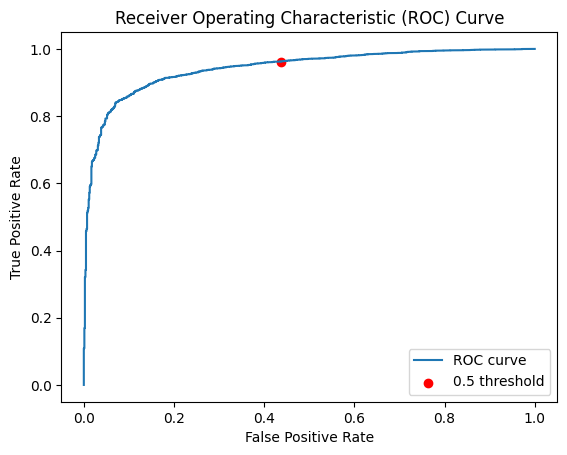

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and threshold
fprs_nb, tprs_nb, thresholds_nb = roc_curve(y_true, y_pred_probs_nb)
auc_nb=metrics.auc(fprs_nb, tprs_nb)
print('AUC:', '%.3f' % auc_nb)

# plot the ROC curve and the best point
plt.plot(fprs_nb, tprs_nb, label='ROC curve')
plt.scatter(x=fpr_nb, y=tpr_nb, marker='o', color='red', label='0.5 threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Post-Analysis: Threshold optimisation

Choose a criterion to optimise threshold: for example based on accuracy

based on f1 score

In [ ]:
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds_nb:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_nb]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds_nb[f1.index(max(f1))]

print(best_threshold)

0.8869371975457392


to minimize the False Positive Rate (FPR) with the constraint that True Positive Rate (TPR) or recall should be greater than or equal to 0.9.

In [ ]:
best_fpr = 1  # Starting from the worst possible value for False Positive Rate
best_threshold_fpr = thresholds_nb[0]

# Loop over thresholds to find the one with the lowest FPR, with TPR >= 0.9
for fpr, tpr, threshold in zip(fprs_nb, tprs_nb, thresholds_nb):
    if tpr >= 0.9 and fpr < best_fpr:
        best_fpr = fpr
        best_threshold_fpr = threshold

print(f"Best False Positive Rate (with TPR >= 0.9): {best_fpr}")
print(f"Optimal Threshold: {best_threshold_fpr}")

Best False Positive Rate (with TPR >= 0.9): 0.15449101796407186
Optimal Threshold: 0.9880836052279701


In [ ]:
#get predicted probabilities for the best threshold
y_pred_best = (nb.predict_proba(X_test_vec)[:,1] >= best_threshold_fpr).astype(bool)

print(y_pred_best)

[ True  True False ...  True  True  True]


In [ ]:
# Computer TN FP FN TP for the best threshold
tn_bestThreshold, fp_bestThreshold, fn_bestThreshold, tp_bestThreshold = confusion_matrix(y_true, y_pred_best).ravel()
print(confusion_matrix(y_true, y_pred_best))
# Compute FPT and TPR for this k
tpr_bestThreshold = tp_bestThreshold / (tp_bestThreshold + fn_bestThreshold)
fpr_bestThreshold = fp_bestThreshold / (fp_bestThreshold + tn_bestThreshold)

print('True Positive Rate: ', '%.3f' % tpr_bestThreshold)
print('False Positive Rate: ', '%.3f' % fpr_bestThreshold)

[[ 706  129]
 [ 385 3478]]
True Positive Rate:  0.900
False Positive Rate:  0.154


In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred_best)
print(cm)
print(classification_report(y_test, y_pred_best))

[[ 706  129]
 [ 385 3478]]
              precision    recall  f1-score   support

           0       0.65      0.85      0.73       835
           1       0.96      0.90      0.93      3863

    accuracy                           0.89      4698
   macro avg       0.81      0.87      0.83      4698
weighted avg       0.91      0.89      0.90      4698



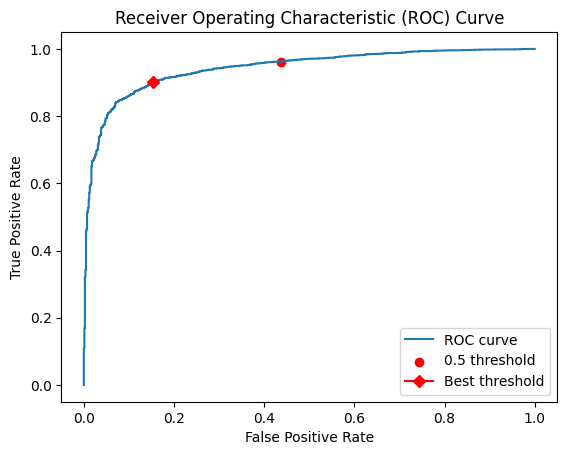

AUC: 0.942


In [ ]:
# plot the ROC curve and the best point
plt.plot(fprs_nb, tprs_nb, label='ROC curve')
plt.scatter(x=fpr_nb, y=tpr_nb, marker='o', color='red', label='0.5 threshold')
plt.plot(fpr_bestThreshold, tpr_bestThreshold, marker='D', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print('AUC:', '%.3f' % auc_nb)

### **3.3.2 ANN**

#### Model building

**Task 20**: Write code to create an ann_clf object and fit it with the training data. This may take several minutes.

In [ ]:
from sklearn.neural_network import MLPClassifier
# create an MLP classifier with 2 hidden layers
ann_clf = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=2023, early_stopping=True)

#Write code train the classifier on the training data. Hint: X_train_vec




MLPClassifier(early_stopping=True, hidden_layer_sizes=(16, 8), max_iter=1000,
              random_state=2023)

#### Performance evaluation

**Task 21**: Write code to make predictions using the test data

In [ ]:
# Write code to evaluate the classifier on the testing data


#get predicted probabilities for the main class
y_pred_probs_ann = ann_clf.predict_proba(X_test_vec)
y_pred_probs_ann = y_pred_probs_ann[:, 1]

In [ ]:
#print confusion matrix and evaluation report
cm_ann=confusion_matrix(y_test, y_pred_ann)
print(cm)
print(classification_report(y_test, y_pred_ann))

[[ 706  129]
 [ 385 3478]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       835
           1       0.95      0.95      0.95      3863

    accuracy                           0.92      4698
   macro avg       0.87      0.87      0.87      4698
weighted avg       0.92      0.92      0.92      4698



In [ ]:
# Computer TN FP FN TP
tn_ann, fp_ann, fn_ann, tp_ann = confusion_matrix(y_test, y_pred_ann).ravel()

# Compute FPT and TPR for this k
tpr_ann = tp_ann / (tp_ann + fn_ann)
fpr_ann = fp_ann / (fp_ann + tn_ann)

print('True Positive Rate: ', '%.3f' % tpr_ann)
print('False Positive Rate: ', '%.3f' % fpr_ann)

True Positive Rate:  0.954
False Positive Rate:  0.223


ANN AUC: 0.963


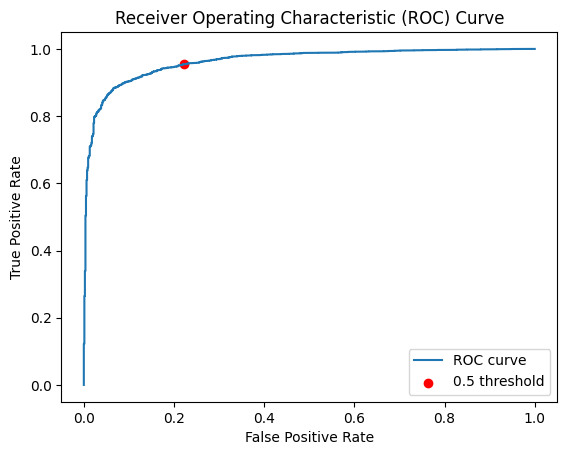

In [ ]:
# Compute the false positive rate, true positive rate, and threshold
fprs_ann, tprs_ann, thresholds_ann = roc_curve(y_true, y_pred_probs_ann)
auc_ann= metrics.auc(fprs_ann, tprs_ann)
print('ANN AUC:', '%.3f' % auc_ann)

# plot the ROC curve and the best point
plt.plot(fprs_ann, tprs_ann, label='ROC curve')
plt.scatter(x=fpr_ann, y=tpr_ann, marker='o', color='red', label='0.5 threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Threshold optimisation

In [ ]:
best_fpr = 1  # Starting from the worst possible value for False Positive Rate
best_threshold_fpr = thresholds_ann[0]

# Loop over thresholds to find the one with the lowest FPR, with TPR >= 0.9
for fpr, tpr, threshold in zip(fprs_ann, tprs_ann, thresholds_ann):
    if tpr >= 0.9 and fpr < best_fpr:
        best_fpr = fpr
        best_threshold_fpr = threshold

print(f"Best False Positive Rate (with TPR >= 0.9): {best_fpr}")
print(f"Optimal Threshold: {best_threshold_fpr}")

Best False Positive Rate (with TPR >= 0.9): 0.09101796407185629
Optimal Threshold: 0.8474605126660748


In [ ]:
#get predicted probabilities for the best threshold
y_pred_best_ann = (ann_clf.predict_proba(X_test_vec)[:,1] >= best_threshold_fpr).astype(bool)

In [ ]:
# Computer TN FP FN TP for the best threshold
tn_bestThreshold_ann, fp_bestThreshold_ann, fn_bestThreshold_ann, tp_bestThreshold_ann = confusion_matrix(y_true, y_pred_best_ann).ravel()
print(confusion_matrix(y_true, y_pred_best_ann))
# Compute FPT and TPR for this k
tpr_bestThreshold = tp_bestThreshold_ann / (tp_bestThreshold_ann + fn_bestThreshold_ann)
fpr_bestThreshold = fp_bestThreshold_ann / (fp_bestThreshold_ann + tn_bestThreshold_ann)

print('True Positive Rate: ', '%.3f' % tpr_bestThreshold)
print('False Positive Rate: ', '%.3f' % fpr_bestThreshold)

[[ 759   76]
 [ 383 3480]]
True Positive Rate:  0.901
False Positive Rate:  0.091


In [ ]:
#print confusion matrix and evaluation report
cm_ann_best=confusion_matrix(y_test, y_pred_best_ann)
print(cm_ann_best)
print(classification_report(y_test, y_pred_best_ann))

[[ 759   76]
 [ 383 3480]]
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       835
           1       0.98      0.90      0.94      3863

    accuracy                           0.90      4698
   macro avg       0.82      0.90      0.85      4698
weighted avg       0.92      0.90      0.91      4698



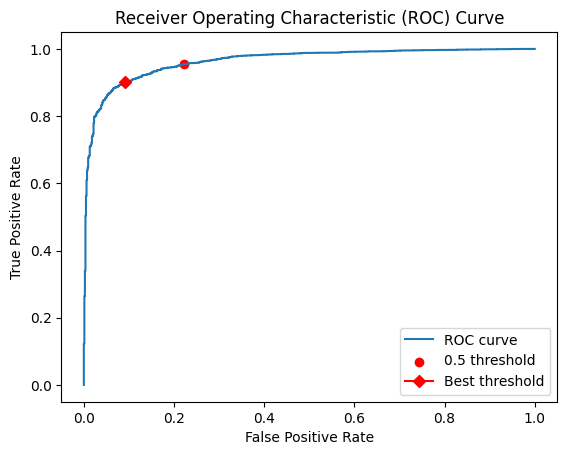

ANN AUC: 0.963


In [ ]:
# plot the ROC curve and the best point
plt.plot(fprs_ann, tprs_ann, label='ROC curve')
plt.scatter(x=fpr_ann, y=tpr_ann, marker='o', color='red', label='0.5 threshold')
plt.plot(fpr_bestThreshold, tpr_bestThreshold, marker='D', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc_ann=metrics.auc(fprs_ann, tprs_ann)
print('ANN AUC:', '%.3f' % auc_ann)

### **3.3.3 Model comparison**

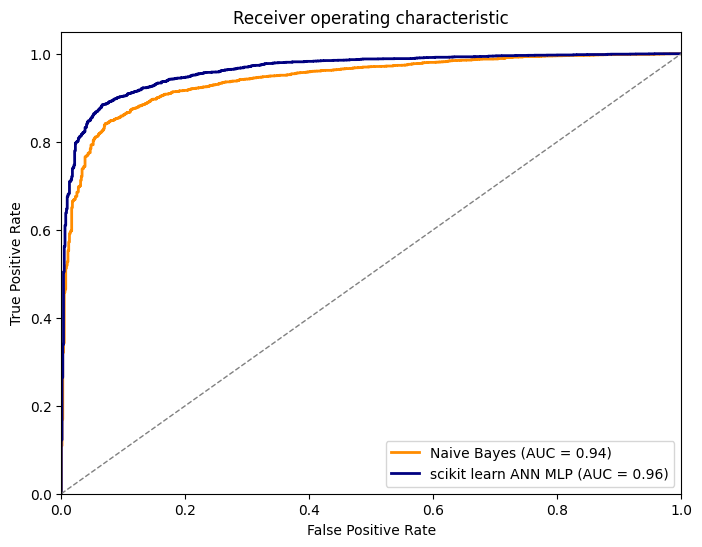

Naive Bayes AUC: 0.94
MLP AUC: 0.96


In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprs_nb, tprs_nb, color='darkorange', lw=2, label='Naive Bayes (AUC = %0.2f)' % auc_nb)
plt.plot(fprs_ann, tprs_ann, color='navy', lw=2, label='scikit learn ANN MLP (AUC = %0.2f)' % auc_ann)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Naive Bayes AUC:','%.2f' %  auc_nb)
print('MLP AUC:', '%.2f' %auc_ann)

# **Congratulations**

**Optional tasks:**

*   Compare and select a model. Explain your selection.
*   Write code to pickle your selected model. Don't forget to pickly the vocabulary as well.
*   Collect additional review data from the Internet. Unpickle the model and use the model to conduct sentiment analysis. Report the findings.
*   If you cannot find thr above data, maybe split the original dataset into Training, Test and Validation subsets. Then build and test a model using the first two datasets, pickle it and validate it with the Validation dataset.

